NAMESSSS

Introduction and Background here

Package imports here

In [131]:
# Imports
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import requests
import bs4
from bs4 import BeautifulSoup
from pandas.plotting import scatter_matrix

Data Description

Data importing here

In [2]:
# Import our csv file
df_complaints = pd.read_csv('Consumer_Complaints.csv')

# Request data from the two wiki pages we have
page_income = requests.get('https://en.wikipedia.org/wiki/List_of_U.S._states_by_income')
soup_income = BeautifulSoup(page_income.content, 'html.parser')

page_education = requests.get('https://en.wikipedia.org/wiki/List_of_U.S._states_by_educational_attainment')
soup_education = BeautifulSoup(page_education.content, 'html.parser')

page_population = requests.get('https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_population')
soup_population = BeautifulSoup(page_population.content, 'html.parser')

# Properly place all the wiki page data into tables
table_income = soup_income.find("table", {"class": "wikitable sortable"})
table_education = soup_education.find("table", {"class": "wikitable sortable"})
table_population = soup_population.find("table", {"class": "wikitable sortable"})

# Extract the table data into lists
income_a, income_b = [], []
edu_a, edu_b, edu_c, edu_d, edu_e, edu_f, edu_g = [], [], [], [], [], [], []
pop_a, pop_b = [], []
sum = 0

for row in table_income.findAll('tr'):
    
    cells = row.findAll('td')
    if len(cells) != 7:
        continue
    try:
        income_a.append(cells[1].find('a').text)
        income_b.append(cells[2].find(text=True))
    except:
        break
        
for row in table_education.findAll('tr'):
    
    cells = row.findAll('td')
    if len(cells) != 7:
        continue
    try:
        edu_a.append(cells[0].find('a').text)
        edu_b.append(cells[1].find(text=True))
        edu_c.append(cells[2].find(text=True))
        edu_d.append(cells[3].find(text=True))
        edu_e.append(cells[4].find(text=True))
        edu_f.append(cells[5].find(text=True))
        edu_g.append(cells[6].find(text=True))
    except:
        break
        
for row in table_population.findAll('tr'):
    
    cells = row.findAll('td')
    if len(cells) != 9:
        continue
    try:
        pop_a.append(cells[2].find('a').text)
        pop_b.append(cells[3].find(text=True))
    except:
        break
        

# Put our web-scraped data into datasets
df_income = pd.DataFrame(
    {'State': income_a,
     'Average Income': income_b,
    })

df_education = pd.DataFrame(
    {'State': edu_a,
     'HS grad %': edu_b,
     'HS grad ranking': edu_c,
     'Bachelor %': edu_d,
     'Bachelor rank': edu_e,
     'Advanced %': edu_f,
     'Advanced rank': edu_g
    })

df_population = pd.DataFrame(
    {'State': pop_a,
     'Population': pop_b
    })

Data Cleaning and preprocessing here

In [3]:
# Method to convert all states to their abbreviations
def abbreviate_state(str_in):
    if(str_in == 'Alabama'):
        return 'AL'
    elif(str_in == 'Alaska'):
        return 'AK'
    elif(str_in == 'Arizona'):
        return 'AZ'
    elif(str_in == 'Arkansas'):
        return 'AR'
    elif(str_in == 'California'):
        return 'CA'
    elif(str_in == 'Colorado'):
        return 'CO'
    elif(str_in == 'Connecticut'):
        return 'CT'
    elif(str_in == 'Delaware'):
        return 'DE'
    elif(str_in == 'Florida'):
        return 'FL'
    elif(str_in == 'Georgia'):
        return 'GA'
    elif(str_in == 'Hawaii'):
        return 'HI'
    elif(str_in == 'Idaho'):
        return 'ID'
    elif(str_in == 'Illinois'):
        return 'IL'
    elif(str_in == 'Indiana'):
        return 'IN'
    elif(str_in == 'Iowa'):
        return 'IA'
    elif(str_in == 'Kansas'):
        return 'KS'
    elif(str_in == 'Kentucky'):
        return 'KY'
    elif(str_in == 'Louisiana'):
        return 'LA'
    elif(str_in == 'Maine'):
        return 'ME'
    elif(str_in == 'Maryland'):
        return 'MD'
    elif(str_in == 'Massachusetts'):
        return 'MA'
    elif(str_in == 'Michigan'):
        return 'MI'
    elif(str_in == 'Minnesota'):
        return 'MN'
    elif(str_in == 'Mississippi'):
        return 'MS'
    elif(str_in == 'Missouri'):
        return 'MO'
    elif(str_in == 'Montana'):
        return 'MT'
    elif(str_in == 'Nebraska'):
        return 'NE'
    elif(str_in == 'Nevada'):
        return 'NV'
    elif(str_in == 'New Hampshire'):
        return 'NH'
    elif(str_in == 'New Jersey'):
        return 'NJ'
    elif(str_in == 'New Mexico'):
        return 'NM'
    elif(str_in == 'New York'):
        return 'NY'
    elif(str_in == 'North Carolina'):
        return 'NC'
    elif(str_in == 'North Dakota'):
        return 'ND'
    elif(str_in == 'Ohio'):
        return 'OH'
    elif(str_in == 'Oklahoma'):
        return 'OK'
    elif(str_in == 'Oregon'):
        return 'OR'
    elif(str_in == 'Pennsylvania'):
        return 'PA'
    elif(str_in == 'Rhode Island'):
        return 'RI'
    elif(str_in == 'South Carolina'):
        return 'SC'
    elif(str_in == 'South Dakota'):
        return 'SD'
    elif(str_in == 'Tennessee'):
        return 'TN'
    elif(str_in == 'Texas'):
        return 'TX'
    elif(str_in == 'Utah'):
        return 'UT'
    elif(str_in == 'Vermont'):
        return 'VT'
    elif(str_in == 'Virginia'):
        return 'VA'
    elif(str_in == 'Washington'):
        return 'WA'
    elif(str_in == 'West Virginia'):
        return 'WV'
    elif(str_in == 'Wisconsin'):
        return 'WI'
    elif(str_in == 'Wyoming'):
        return 'WY'
    elif(str_in == 'District of Columbia'):
        return 'DC'
    else:
        return 'NONE'

In [4]:
# Here we clean the income, education, and population dataframes
# Abbreviate all states in our education and income dataframes to match complaints dataframe
df_education['State'] = df_education['State'].apply(abbreviate_state)
df_income['State'] = df_income['State'].apply(abbreviate_state)
df_population['State'] = df_population['State'].apply(abbreviate_state)

# Set state as index
df_education.set_index('State', inplace=True)
df_income.set_index('State', inplace=True)
df_population.set_index('State', inplace=True)

# Remove non-states
df_education.drop('NONE', inplace=True)
df_income.drop('NONE',  inplace=True)
df_population.drop('NONE', inplace=True)

In [5]:
# Here we clean the complaints dataframe
# Remove columns that have no state in the complaints dataframe
df_complaints.dropna(subset = ['State'], inplace=True)
df_complaints.reset_index(inplace=True)
df_complaints.drop('index', axis=1, inplace=True)

# First we should get rid of any privacy issues
df_complaints.drop(['ZIP code', 'Company'], axis=1, inplace=True)

# Next we should get rid of any columns we don't need
df_complaints.drop(['Sub-product', 'Sub-issue', 'Consumer complaint narrative', 'Tags',
                    'Consumer consent provided?', 'Complaint ID'], axis=1, inplace=True)

In [6]:
#df_complaints['Product'].unique()

Data processing here

In [7]:
# Create a list of state abbreviations to be used later
states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI',
          'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI',
          'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC',
          'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT',
          'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'DC']

# Count the number of complaints per state, also clean data so that products column is cleaner
complaints_per_state = {}
num_complaints = {}
for index, row in df_complaints.iterrows():
    
    # Count complaints
    key = df_complaints.iloc[index]['State']
    if key in complaints_per_state:
        complaints_per_state[key] += 1
    else:
        complaints_per_state[key] = 1
        
    # Simplify/clean products column
    if 'report' in df_complaints.iloc[index]['Product']:
        df_complaints.iloc[index]['Product'] = 'Credit Reporting, Credit Repair Services, or Other Personal Consumer Reports'
    elif 'card' in df_complaints.iloc[index]['Product']:
        df_complaints.iloc[index]['Product'] = 'Credit Card or Prepaid Card'
    elif 'Payday' in df_complaints.iloc[index]['Product']:
        df_complaints.iloc[index]['Product'] = 'Payday Loan, Title Loan, or Personal Loan'
    elif 'Money' in df_complaints.iloc[index]['Product']:
        df_complaints.iloc[index]['Product'] = 'Money Transfer, Virtual Currency, or Money Service'
    elif 'Virtual' in df_complaints.iloc[index]['Product']:
        df_complaints.iloc[index]['Product'] = 'Money Transfer, Virtual Currency, or Money Service'
    elif 'Bank' in df_complaints.iloc[index]['Product']:
        df_complaints.iloc[index]['Product'] = 'Bank account or Services'
    elif 'Checking' in df_complaints.iloc[index]['Product']:
        df_complaints.iloc[index]['Product'] = 'Bank account or Services'

In [8]:
# Drop keys that aren't from the US
complaints_per_state.pop('MP')
complaints_per_state.pop('PR')
complaints_per_state.pop('VI')
complaints_per_state.pop('PW')
complaints_per_state.pop('AS')
complaints_per_state.pop('FM')
complaints_per_state.pop('GU')
complaints_per_state.pop('AE')
complaints_per_state.pop('AA')
complaints_per_state.pop('MH')
complaints_per_state.pop('AP')

272

In [9]:
# Calculate complaints per population
complaints_percent = {}
for state in states:
    temp = float(complaints_per_state[state]) / float(df_population.loc[state]['Population'].replace(',',''))
    temp *= 100
    temp = str(temp)[0:4] + "%"
    complaints_percent[state] = temp
    
    

In [10]:
# Find the top 3 issues of complaint per state
state_issues = {}
num_issues = {}
for state in states:
    issue1 = df_complaints.loc[df_complaints['State'] == state]['Product'].value_counts().index[0]
    issue2 = df_complaints.loc[df_complaints['State'] == state]['Product'].value_counts().index[1]
    issue3 = df_complaints.loc[df_complaints['State'] == state]['Product'].value_counts().index[2]
    
    num_issue = df_complaints.loc[df_complaints['State'] == state]['Product'].value_counts()
    num1 = str(num_issue.iloc[0] / num_issue.sum())[:5]
    num2 = str(num_issue.iloc[1] / num_issue.sum())[:5]
    num3 = str(num_issue.iloc[2] / num_issue.sum())[:5]

    issues = "1. " + issue1 + " 2. "  + issue2 + " 3. " + issue3
    nums = num1 + ", " + num2 + ", " + num3
    state_issues[state] = issues
    num_issues[state] = nums

Data Visualization

In [11]:
# Results Compiled from Dataframes

df_results = pd.DataFrame([complaints_per_state, state_issues,num_issues,complaints_percent]).T
df_results.columns = ['# of Complaints', 'Top 3 Issues', 'Issue %', '% of Complaints']
df_results['Avg Income'] = df_income['Average Income']
df_results['Population'] = df_population['Population']
df_results['HS Grad Rate'] = df_education['HS grad %']
df_results = df_results[['% of Complaints', 'Avg Income', 'HS Grad Rate', 'Top 3 Issues', 'Issue %', '# of Complaints', 'Population']]
df_results

,% of Complaints,Avg Income,HS Grad Rate,Top 3 Issues,Issue %,# of Complaints,Population
AK,0.14%,"$73,355",92.1%,"1. Credit Reporting, Credit Repair Services, o...","0.223, 0.214, 0.196",1086,"739,795"
AL,0.22%,"$44,765",84.3%,"1. Credit Reporting, Credit Repair Services, o...","0.302, 0.222, 0.182",10824,"4,874,747"
AR,0.14%,"$41,995",84.8%,"1. Credit Reporting, Credit Repair Services, o...","0.279, 0.218, 0.190",4467,"3,004,279"
AZ,0.30%,"$51,492",86.0%,1. Mortgage 2. Debt collection 3. Credit Repor...,"0.269, 0.206, 0.203",21447,"7,016,270"
CA,0.34%,"$64,500",79.8%,"1. Mortgage 2. Credit Reporting, Credit Repair...","0.309, 0.213, 0.175",137907,"39,536,653"
CO,0.29%,"$63,909",90.7%,"1. Mortgage 2. Credit Reporting, Credit Repair...","0.268, 0.220, 0.191",16474,"5,607,154"
CT,0.31%,"$71,346",89.9%,"1. Mortgage 2. Credit Reporting, Credit Repair...","0.270, 0.198, 0.144",11294,"3,588,184"
DC,0.79%,"$75,628",89.3%,"1. Mortgage 2. Credit Reporting, Credit Repair...","0.225, 0.197, 0.158",5499,"693,972"
DE,0.51%,"$61,255",88.4%,"1. Mortgage 2. Credit Reporting, Credit Repair...","0.237, 0.210, 0.180",4915,"961,939"
FL,0.44%,"$49,426",86.9%,"1. Mortgage 2. Credit Reporting, Credit Repair...","0.282, 0.248, 0.194",93265,"20,984,400"


[Text(0,0.5,'Product Issue Counts'),
 Text(0.5,0,'Product Issues'),
 Text(0.5,1,'Total Counts of Issues Across All 50 States')]

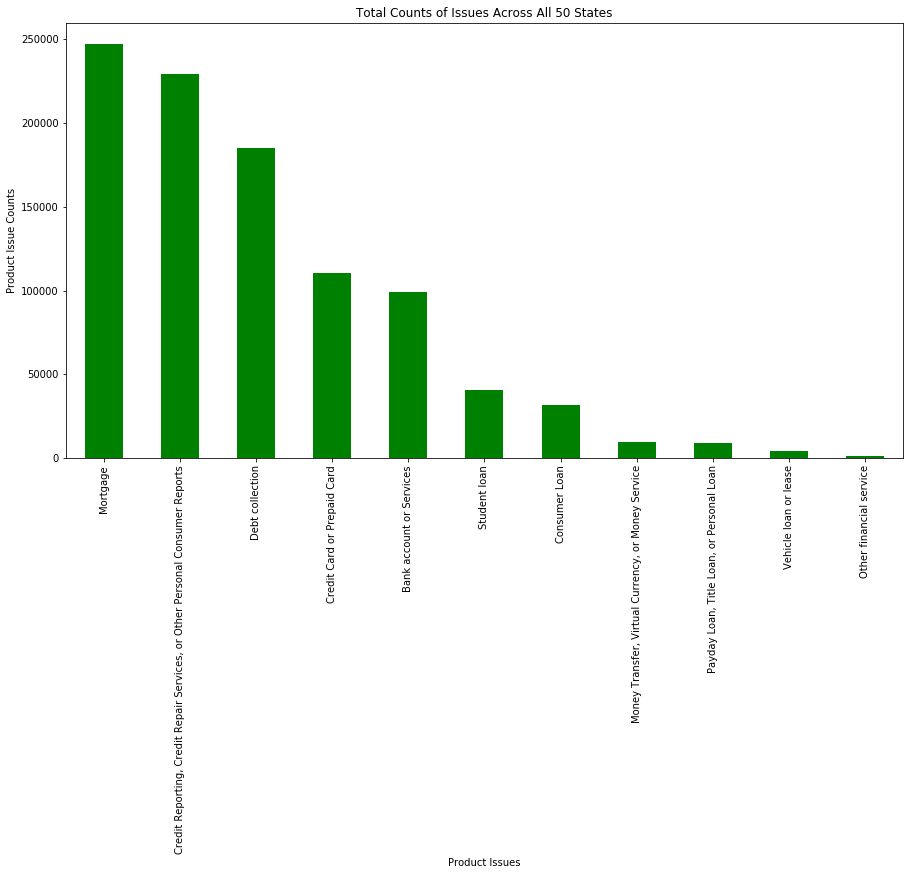

In [154]:
# Bar Plot of Total Counts of Issues Across All 50 States

axes = df_complaints.Product.value_counts().plot.bar(figsize=(15, 8), color="green")
axes.set(xlabel="Product Issues", ylabel="Product Issue Counts", title="Total Counts of Issues Across All 50 States")

[Text(0,0.5,'Product Issue Counts'),
 Text(0.5,0,'Product Issues'),
 Text(0.5,1,'Total Counts of Issues in California')]

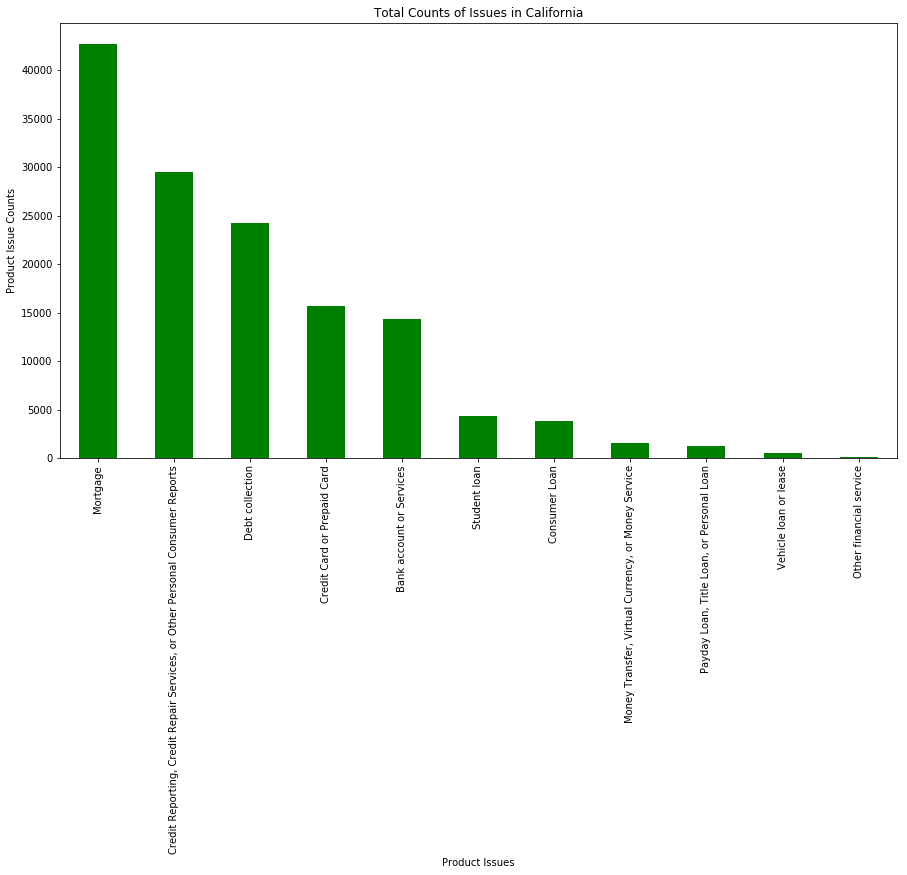

In [13]:
# Total Complaints in California, as an example

df_calif = df_complaints
df_calif.sort_values(by=['State'], inplace=True)
df_calif.set_index(keys=['State'], drop=False,inplace=True)
df_calif = df_calif.loc[df_calif.State=='CA']

axes = df_calif.Product.value_counts().plot.bar(figsize=(15, 8), color="green")
axes.set(xlabel="Product Issues", ylabel="Product Issue Counts", title="Total Counts of Issues in California")

Bar Charts Showing the Top Three Complaints and their Counts Across All 50 States

[Text(0,0.5,'Mortgage Issue Counts'),
 Text(0.5,0,'States'),
 Text(0.5,1,'Total Counts of Mortgage Issues per State')]

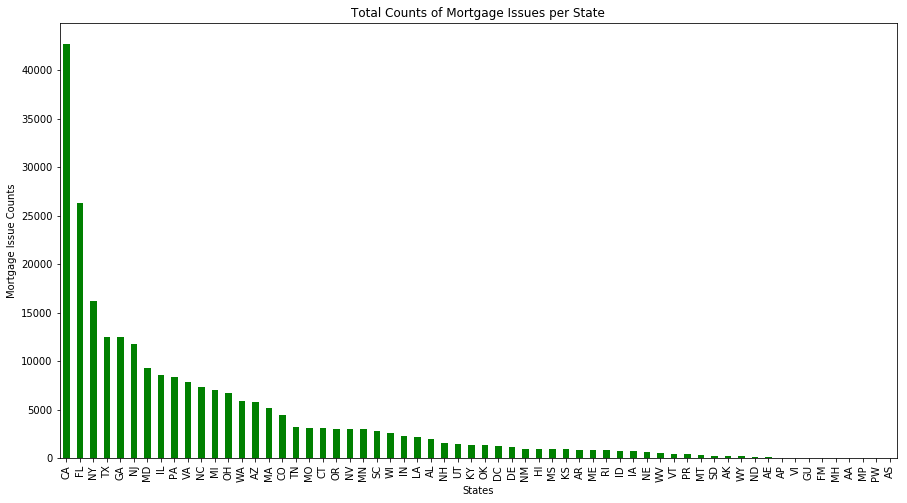

In [153]:
# Bar Plot of Mortgage Issues per State

df_mortgage = df_complaints
df_mortgage.sort_values(by=['Product'], inplace=True)
df_mortgage.set_index(keys=['Product'], drop=False,inplace=True)
df_mortgage = df_mortgage.loc[df_mortgage.Product=='Mortgage']

axes = df_mortgage.State.value_counts().plot.bar(figsize=(15, 8), color="green")
axes.set(ylabel="Mortgage Issue Counts", xlabel="States", title="Total Counts of Mortgage Issues per State")

[Text(0,0.5,'Credit-Related Issue Counts'),
 Text(0.5,0,'States'),
 Text(0.5,1,'Total Counts of Credit-Related Issues per State')]

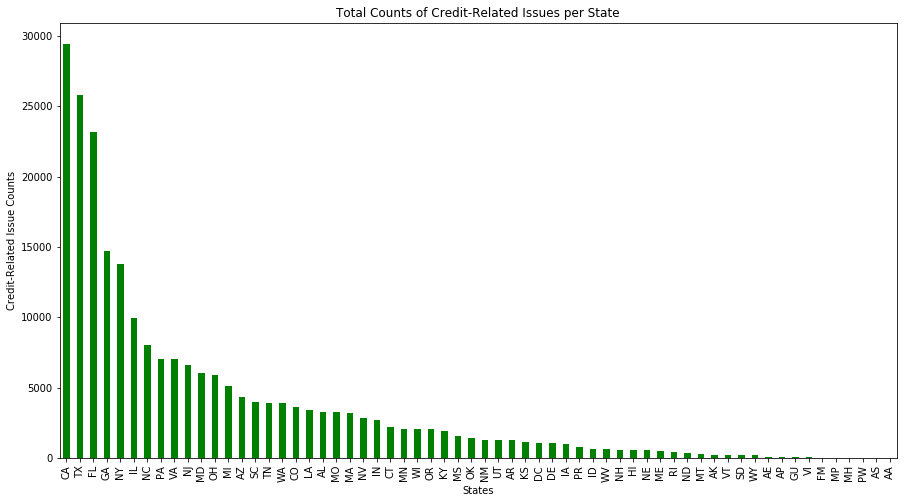

In [152]:
# Bar Plot of Credit-Related Issues per State

df_credit = df_complaints
df_credit.sort_values(by=['Product'], inplace=True)
df_credit.set_index(keys=['Product'], drop=False,inplace=True)
df_credit = df_credit.loc[df_credit.Product=='Credit Reporting, Credit Repair Services, or Other Personal Consumer Reports']

axes = df_credit.State.value_counts().plot.bar(figsize=(15, 8), color="green")
axes.set(ylabel="Credit-Related Issue Counts", xlabel="States", title="Total Counts of Credit-Related Issues per State")

[Text(0,0.5,'Debt Collection Issue Counts'),
 Text(0.5,0,'States'),
 Text(0.5,1,'Total Counts of Debt Collection Issues per State')]

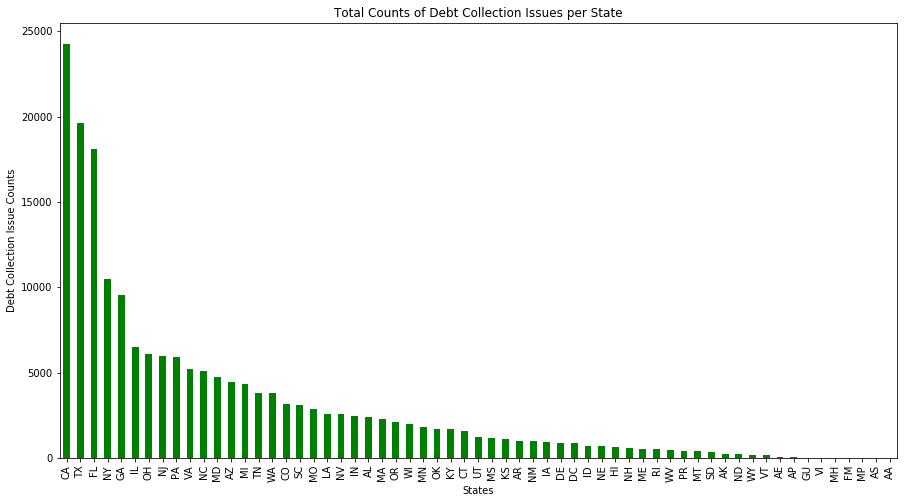

In [151]:
# Bar Plot of Debt Collection Issues per State

df_debt = df_complaints
df_debt.sort_values(by=['Product'], inplace=True)
df_debt.set_index(keys=['Product'], drop=False,inplace=True)
df_debt = df_debt.loc[df_debt.Product=='Debt collection']

axes = df_debt.State.value_counts().plot.bar(figsize=(15, 8), color="green")
axes.set(ylabel="Debt Collection Issue Counts", xlabel="States", title="Total Counts of Debt Collection Issues per State")

Top Income, Top Education and Top % Complaints Bar Plots

In [104]:
# Helper Method to Convert Strings to Integers
def convert_to_float(number):
    if ',' in number:
        number = number.replace(',', '')
        
    if '$' in number:
        number = number.replace('$', '')
        
    if '%' in number:
        number = number.replace('%', '')
    
    return float(number)

[Text(0,0.5,'Population'),
 Text(0.5,0,'States'),
 Text(0.5,1,'Population Count per State')]

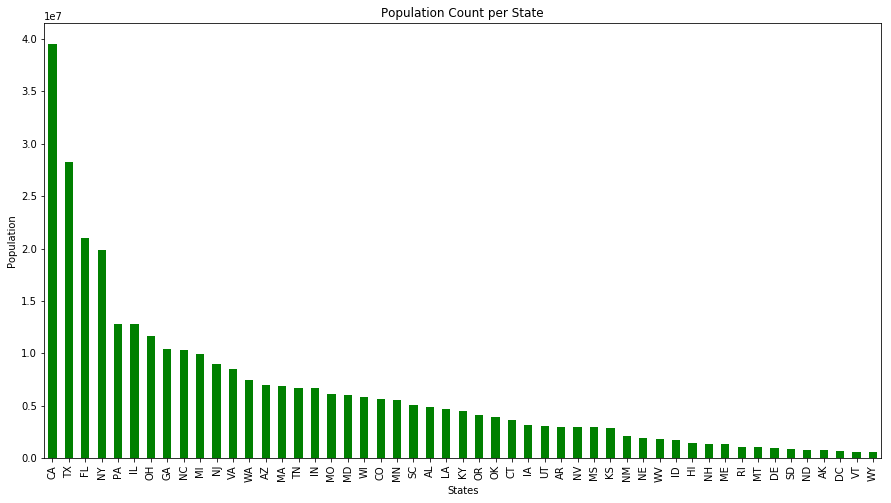

In [105]:
# Bar Plot of Population per State

df_pop = df_population
df_pop = df_pop.Population.apply(convert_to_float)
df_pop = df_pop.sort_values(ascending=False)
axes = df_pop.plot.bar(figsize=(15, 8), color="green")
axes.set(ylabel="Population", xlabel="States", title="Population Count per State")

[Text(0,0.5,'Average Income'),
 Text(0.5,0,'States'),
 Text(0.5,1,'Average Income per State')]

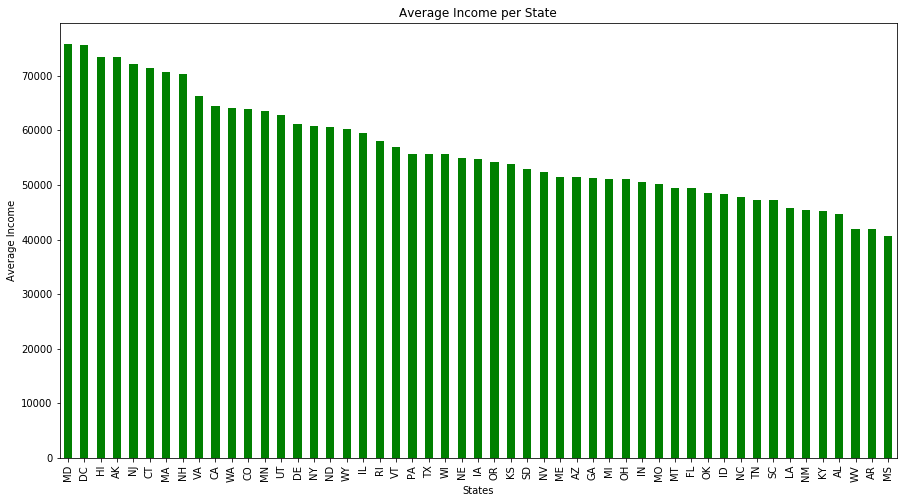

In [106]:
# Bar Plot of Average Income per State

df_inc = df_income
df_inc = df_inc["Average Income"].apply(convert_to_float)
df_inc = df_inc.sort_values(ascending=False)
axes = df_inc.plot.bar(figsize=(15, 8), color="green")
axes.set(ylabel="Average Income", xlabel="States", title="Average Income per State")

[Text(0,0.5,'High School Graduation Rate %'),
 Text(0.5,0,'States'),
 Text(0.5,1,'High School Graduation Rate % per State')]

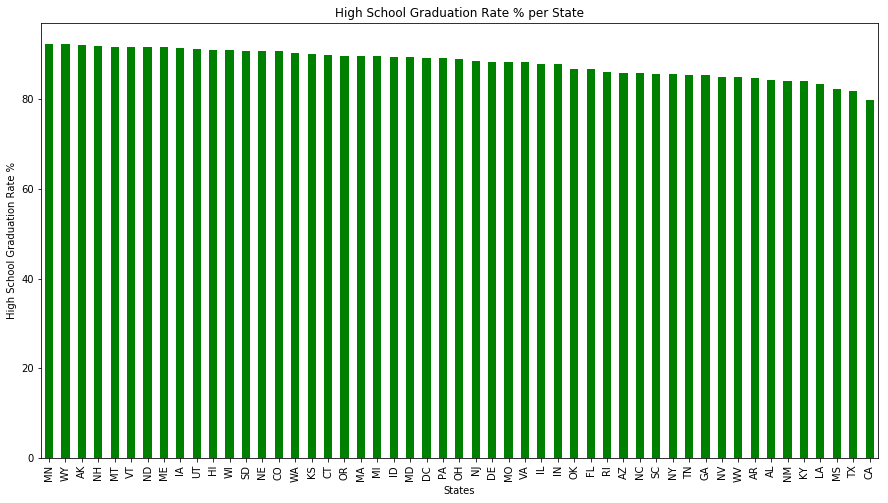

In [107]:
# Bar Plot of High School Graduation % per State

df_hsgrad = df_education["HS grad %"]
df_hsgrad = df_hsgrad.sort_values(ascending=False)
df_hsgrad = df_hsgrad.apply(convert_to_float)
axes = df_hsgrad.plot.bar(figsize=(15, 8), color="green")
axes.set(ylabel="High School Graduation Rate %", xlabel="States", title="High School Graduation Rate % per State")

[Text(0,0.5,'Complaints / Overall Population'),
 Text(0.5,0,'States'),
 Text(0.5,1,'Complaints / Overall Population per State')]

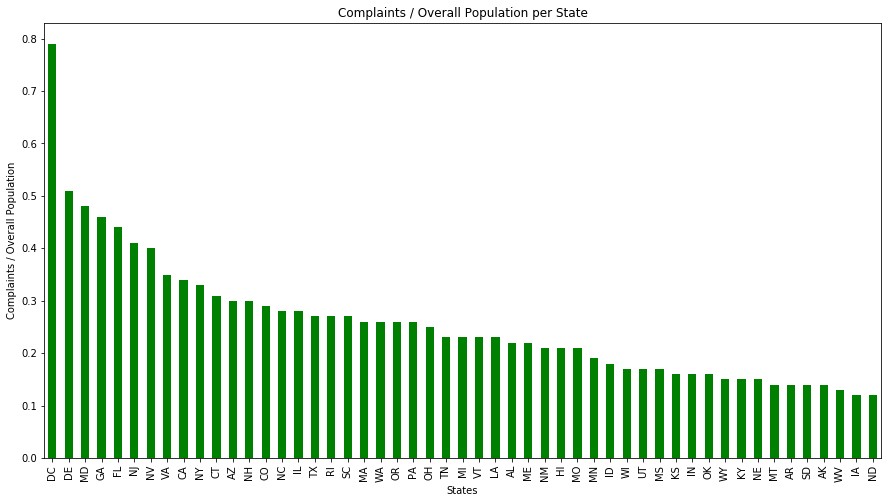

In [108]:
# Bar Plot of Complaints / Overall Population per State States

df_pcomp = df_results["% of Complaints"]
df_pcomp = df_pcomp.apply(convert_to_float)
df_pcomp = df_pcomp.sort_values(ascending=False)
axes = df_pcomp.plot.bar(figsize=(15, 8), color="green")
axes.set(ylabel="Complaints / Overall Population", xlabel="States", title="Complaints / Overall Population per State")

In [145]:
# Helper Method to Converting a Decimal into a Percent

def convert_to_percent(number):
    if '%' in number:
        number = number.replace('%', '')
    
    number = float(number)
    return number * 100

In [146]:
# Converting String Values to Something we can Plot

df_sm = df_results[["% of Complaints", "Avg Income", "HS Grad Rate", "# of Complaints", "Population"]]
df_sm.is_copy = None
df_sm["% of Complaints"] = df_sm["% of Complaints"].apply(convert_to_percent)
df_sm["Avg Income"] = df_sm["Avg Income"].apply(convert_to_float)
df_sm["HS Grad Rate"] = df_sm["HS Grad Rate"].apply(convert_to_float)
df_sm["Population"] = df_sm["Population"].apply(convert_to_float)

Text(0.5,0,'HS Grad Rate')

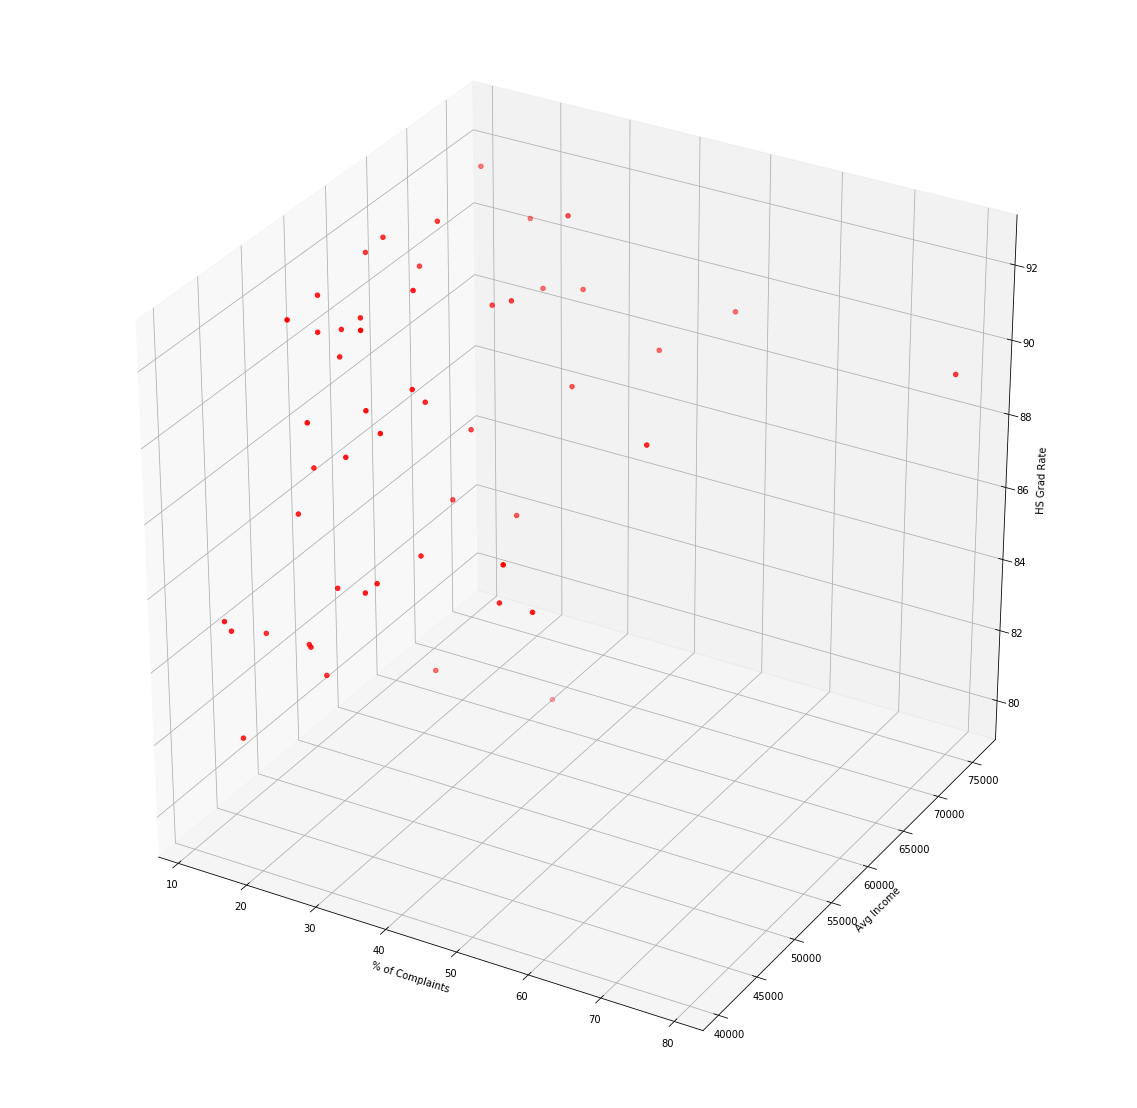

In [147]:
# 3-D Plot for Viewing Data Differently
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fig.set_size_inches(20, 20)
for c,m in [('r', 'o')]:
    x = df_sm['% of Complaints']
    y = df_sm['Avg Income']
    z = df_sm['HS Grad Rate']
    ax.scatter(x, y, z, c=c, marker=m)
ax.set_xlabel('% of Complaints')
ax.set_ylabel('Avg Income')
ax.set_zlabel('HS Grad Rate')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122b36e10>,
      dtype=object)

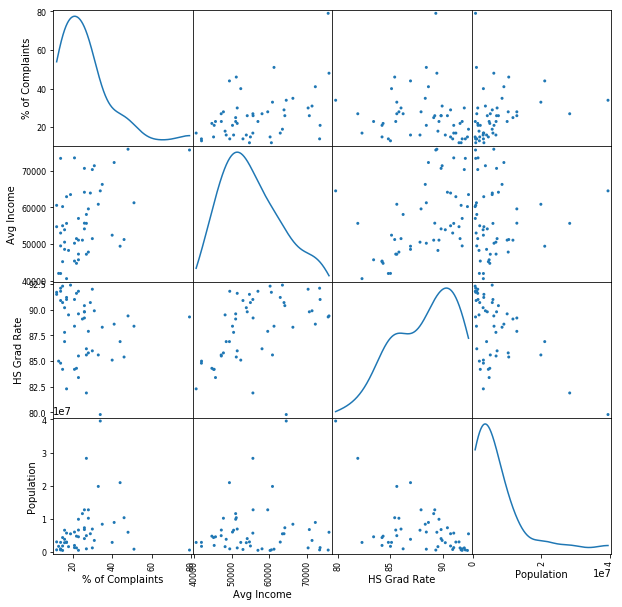

In [148]:
# Scatter Matrix Plot

scatter_matrix(df_sm, alpha=1, figsize=(10, 10), diagonal='kde')

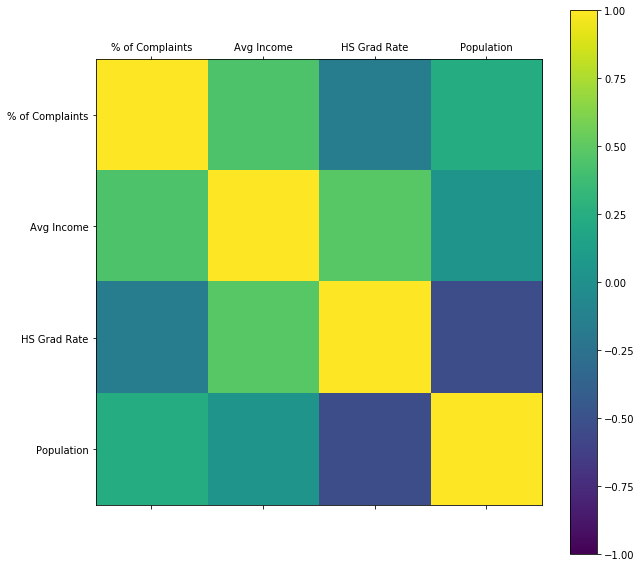

In [149]:
# Correlation Matrix

# Define correlations and columns
correlations = df_sm.corr()
columns = ['% of Complaints', 'Avg Income', 'HS Grad Rate', 'Population']

# Plot the correlation matrix
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, 4, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(columns)
ax.set_yticklabels(columns)
plt.show()